In [1]:
#!pip install opencv-python

In [2]:
import os
import numpy as np
import pandas as pd
import PIL
import cv2
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("A:\WORK\MajorProject\Dataset\mpii_human_pose.csv")

In [4]:
df.shape

(17372, 37)

In [5]:
df.head()

,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,1,015601864.jpg,620,394,616,269,573,185,647,188,...,167,692,185,693,240,688,313,3.021046,curling,sports
1,2,015599452.jpg,-1,-1,-1,-1,806,543,720,593,...,281,719,299,711,516,545,466,5.641276,curling,sports
2,3,005808361.jpg,804,711,816,510,908,438,1040,454,...,253,1067,253,1167,353,1142,478,4.718488,curling,sports
3,4,086617615.jpg,301,461,305,375,201,340,294,342,...,261,314,264,327,320,362,346,2.681349,curling,sports
4,5,060111501.jpg,980,322,896,318,865,248,943,226,...,147,923,123,995,163,961,223,3.806403,curling,sports


In [6]:
len(df["Category"].unique())

21

In [7]:
df["Category"].unique()

array(['sports', 'inactivity quiet/light', 'miscellaneous', 'occupation',
       'water activities', 'home activities', 'lawn and garden',
       'religious activities', 'winter activities',
       'conditioning exercise', 'bicycling', 'fishing and hunting',
       'dancing', 'walking', 'running', 'self care', 'home repair',
       'music playing', 'transportation', 'volunteer activities', '[]'],
      dtype=object)

In [8]:
for cat in df["Category"].unique():
    print(cat, "----->", df[df["Category"]==cat].shape[0])

sports -----> 3450
inactivity quiet/light -----> 185
miscellaneous -----> 741
occupation -----> 2329
water activities -----> 1008
home activities -----> 1377
lawn and garden -----> 1092
religious activities -----> 120
winter activities -----> 740
conditioning exercise -----> 1682
bicycling -----> 516
fishing and hunting -----> 705
dancing -----> 697
walking -----> 577
running -----> 291
self care -----> 89
home repair -----> 1065
music playing -----> 534
transportation -----> 87
volunteer activities -----> 46
[] -----> 41


In [9]:
toDrop = ["miscellaneous", "water activities", "bicycling", "fishing and hunting", "dancing", "running", "walking", "[]"]

In [10]:
for drop in toDrop:
    df=df[df.Category != drop]

In [11]:
df.shape

(12796, 37)

In [12]:
df.head()

,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,1,015601864.jpg,620,394,616,269,573,185,647,188,...,167,692,185,693,240,688,313,3.021046,curling,sports
1,2,015599452.jpg,-1,-1,-1,-1,806,543,720,593,...,281,719,299,711,516,545,466,5.641276,curling,sports
2,3,005808361.jpg,804,711,816,510,908,438,1040,454,...,253,1067,253,1167,353,1142,478,4.718488,curling,sports
3,4,086617615.jpg,301,461,305,375,201,340,294,342,...,261,314,264,327,320,362,346,2.681349,curling,sports
4,5,060111501.jpg,980,322,896,318,865,248,943,226,...,147,923,123,995,163,961,223,3.806403,curling,sports


In [13]:
os.chdir("A:\WORK\MajorProject\Dataset\images")

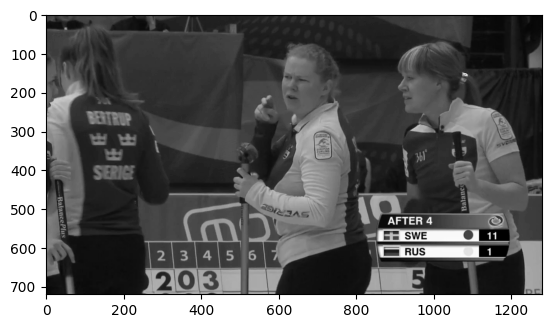

In [29]:
img = cv2.imread("015599452.jpg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(image, cmap="gray")

In [30]:
image = cv2.circle(image, (806,543), radius=10, color=(0, 0, 255), thickness=10)

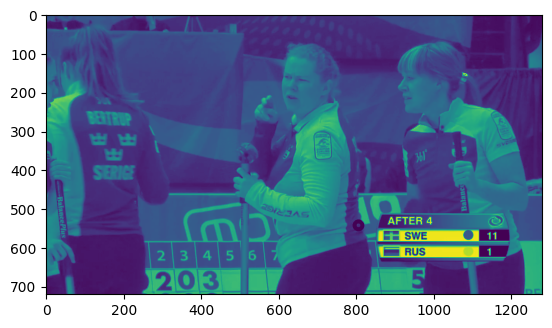

In [32]:
plt.imshow(image)

In [35]:
images = df["NAME"].to_numpy()

In [36]:
images

array(['015601864.jpg', '015599452.jpg', '005808361.jpg', ...,
       '072772110.jpg', '039361034.jpg', '084761779.jpg'], dtype=object)

In [37]:
for image in images:
    if os.path.exists(image):
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        plt.imshow(img, cmap="gray")
    else:
        print(image, "File does not exist")